In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

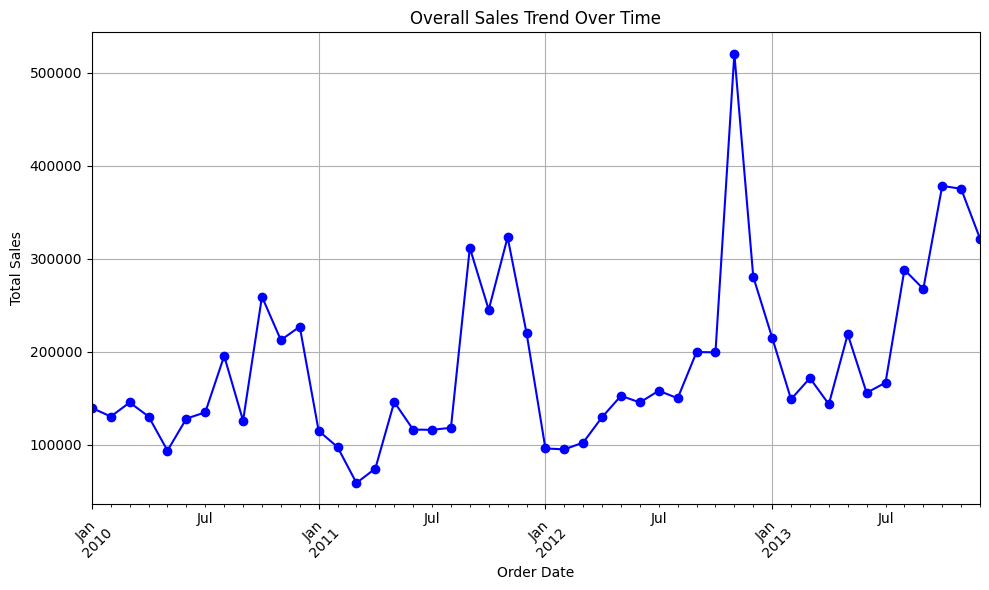

   Order Period  Total Sales
0       2010-01    139730.46
1       2010-02    130534.07
2       2010-03    145615.73
3       2010-04    130542.99
4       2010-05     93938.81
5       2010-06    128304.34
6       2010-07    135036.46
7       2010-08    195567.40
8       2010-09    126080.94
9       2010-10    259288.96
10      2010-11    212633.26
11      2010-12    227059.46
12      2011-01    115144.93
13      2011-02     97745.88
14      2011-03     59156.74
15      2011-04     74669.67
16      2011-05    146157.01
17      2011-06    116518.61
18      2011-07    116243.48
19      2011-08    118415.92
20      2011-09    311721.65
21      2011-10    245237.67
22      2011-11    323051.27
23      2011-12    220444.60
24      2012-01     96276.63
25      2012-02     95216.72
26      2012-03    102573.76
27      2012-04    129869.08
28      2012-05    152760.30
29      2012-06    145649.68
30      2012-07    158228.96
31      2012-08    150146.13
32      2012-09    199804.18
33      2012-1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Excel file
data = pd.read_excel('/kaggle/input/superstore-usa/Superstore_USA.xlsx')

# Convert 'Order Date' to datetime if not already in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Group data by 'Order Date' and sum the 'Sales'
sales_trend = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plotting the sales trend over time
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generating a report
sales_report = sales_trend.reset_index()
sales_report.columns = ['Order Period', 'Total Sales']
print(sales_report)


In [3]:
region_sales_profit = data.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort the regions by total sales
region_sales_profit_sorted = region_sales_profit.sort_values(by='Sales', ascending=False)

# Print the regions contributing the most to sales and profit
print("Regions contributing the most to sales and profit:")
print(region_sales_profit_sorted)

# Alternatively, if you want to focus on states instead of regions
state_sales_profit = data.groupby('State or Province').agg({'Sales': 'sum', 'Profit': 'sum'})
state_sales_profit_sorted = state_sales_profit.sort_values(by='Sales', ascending=False)

# Print the states contributing the most to sales and profit
print("\nStates contributing the most to sales and profit:")
print(state_sales_profit_sorted)


Regions contributing the most to sales and profit:
              Sales         Profit
Region                            
Central  2540341.62  519825.567067
East     2422804.68  377566.186045
West     2391438.80  310849.453897
South    1597346.22  104201.192420

States contributing the most to sales and profit:
                           Sales         Profit
State or Province                              
California            1161720.84   86098.387760
New York               839593.73  113558.974853
Illinois               667797.16  127840.023010
Texas                  543089.00  109005.260814
Washington             508816.41   45329.262557
Florida                503609.51   24416.807245
Michigan               324593.62   53041.351644
Pennsylvania           297371.70   27206.996256
Ohio                   290286.12   69609.273145
Massachusetts          228451.71   42856.248113
District of Columbia   218868.62   25515.488720
North Carolina         200056.30   26620.893697
Georgia         

In [4]:
# Group data by 'Product Category' and 'Product Sub-Category' and sum the 'Sales'
product_sales = data.groupby(['Product Category', 'Product Sub-Category'])['Sales'].sum()

# Sort the product sales in descending order
top_selling_products = product_sales.sort_values(ascending=False)

# Print the top-selling product categories and sub-categories
print("Top-selling product categories and sub-categories:")
print(top_selling_products.head(10))  

Top-selling product categories and sub-categories:
Product Category  Product Sub-Category          
Technology        Office Machines                   1218656.59
Furniture         Chairs & Chairmats                1164584.16
Technology        Telephones and Communication      1144272.98
Furniture         Tables                            1061921.06
Technology        Copiers and Fax                    661211.93
Office Supplies   Binders and Binder Accessories     638582.09
                  Storage & Organization             585704.91
Furniture         Bookcases                          507494.49
Technology        Computer Peripherals               490840.53
Office Supplies   Appliances                         456723.08
Name: Sales, dtype: float64


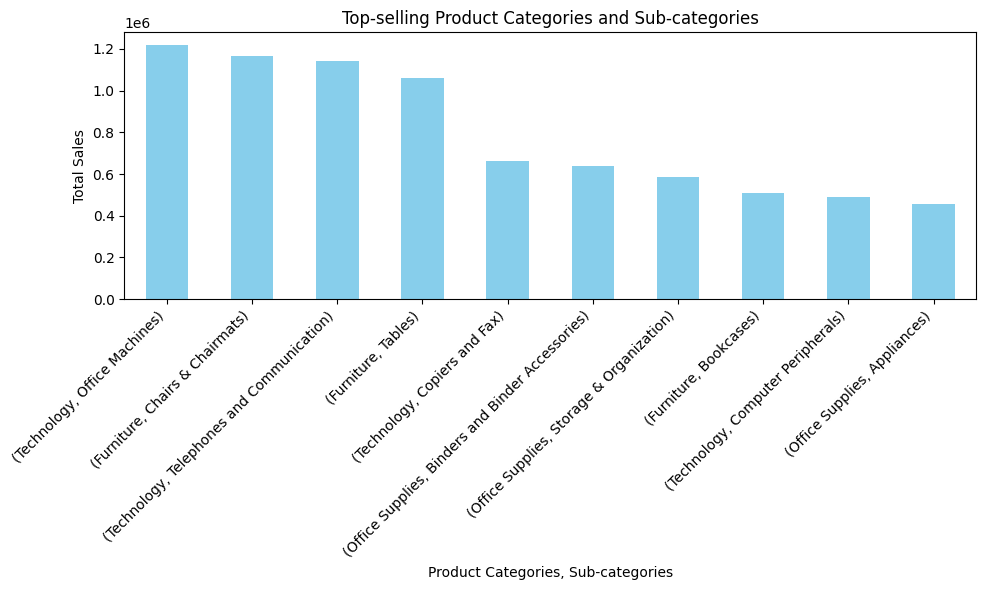

In [5]:
product_sales = data.groupby(['Product Category', 'Product Sub-Category'])['Sales'].sum()

# Sort the product sales in descending order
top_selling_products = product_sales.sort_values(ascending=False).head(10)  # Adjust the number as needed

# Plotting the top-selling product categories and sub-categories
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top-selling Product Categories and Sub-categories')
plt.xlabel('Product Categories, Sub-categories')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

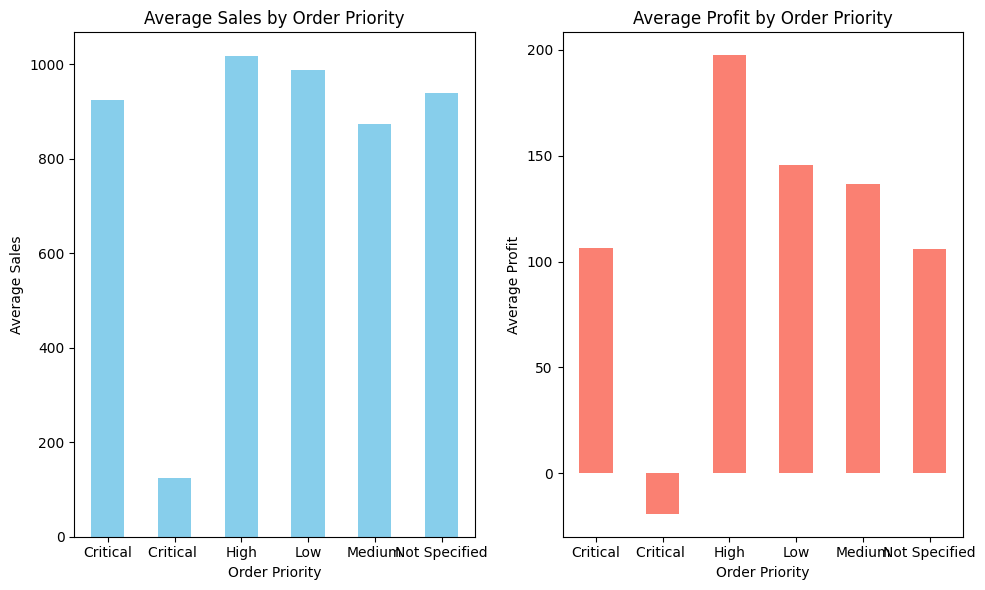

In [15]:
order_priority_analysis = data.groupby('Order Priority').agg({'Sales': 'mean', 'Profit': 'mean'})

# Plotting the relationship between order priority and average sales/profit
plt.figure(figsize=(10, 6))

# Plotting average sales
plt.subplot(1, 2, 1)
order_priority_analysis['Sales'].plot(kind='bar', color='skyblue')
plt.title('Average Sales by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)

# Plotting average profit
plt.subplot(1, 2, 2)
order_priority_analysis['Profit'].plot(kind='bar', color='salmon')
plt.title('Average Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Profit')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [16]:
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

# Group data by 'Product Category' and 'Product Sub-Category' and calculate the average profit margin
category_profit_margin = data.groupby(['Product Category', 'Product Sub-Category'])['Profit Margin'].mean()

# Print the profit margin for each product category and sub-category
print("Profit margin for each product category and sub-category:")
print(category_profit_margin)

Profit margin for each product category and sub-category:
Product Category  Product Sub-Category          
Furniture         Bookcases                         -16.363763
                  Chairs & Chairmats                 -1.115620
                  Office Furnishings                -26.208487
                  Tables                            -32.025559
Office Supplies   Appliances                        -65.528062
                  Binders and Binder Accessories    -78.740536
                  Envelopes                          12.556113
                  Labels                            482.998518
                  Paper                               9.738672
                  Pens & Art Supplies              -121.941049
                  Rubber Bands                     -215.825726
                  Scissors, Rulers and Trimmers     -52.694153
                  Storage & Organization            -58.547005
Technology        Computer Peripherals              -22.180981
           

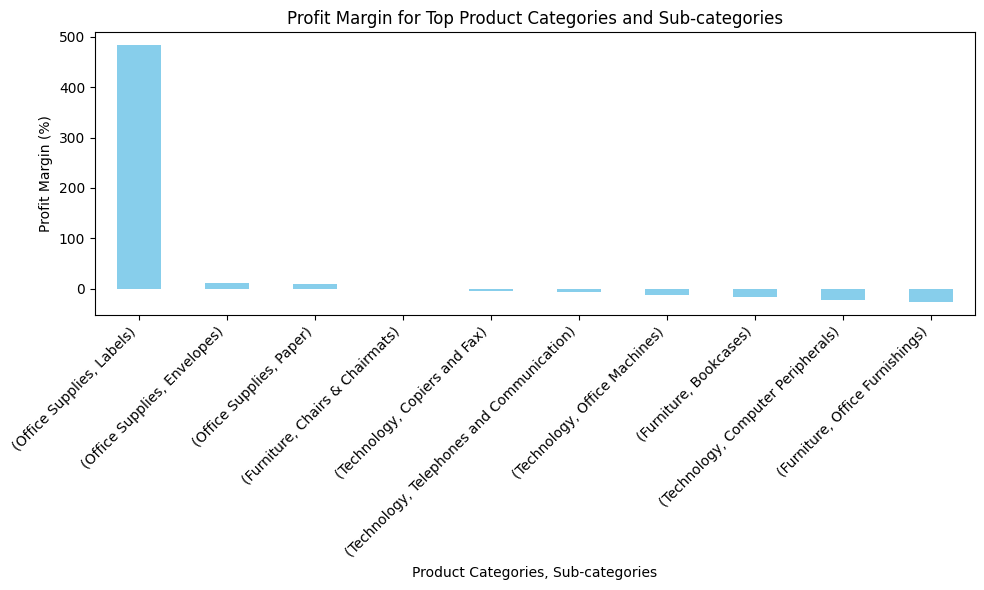

In [17]:
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

# Group data by 'Product Category' and 'Product Sub-Category' and calculate the average profit margin
category_profit_margin = data.groupby(['Product Category', 'Product Sub-Category'])['Profit Margin'].mean()

# Sort the profit margins in descending order
top_profit_margin_categories = category_profit_margin.sort_values(ascending=False).head(10)  # Adjust the number as needed

# Plotting the profit margin for top product categories and sub-categories
plt.figure(figsize=(10, 6))
top_profit_margin_categories.plot(kind='bar', color='skyblue')
plt.title('Profit Margin for Top Product Categories and Sub-categories')
plt.xlabel('Product Categories, Sub-categories')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

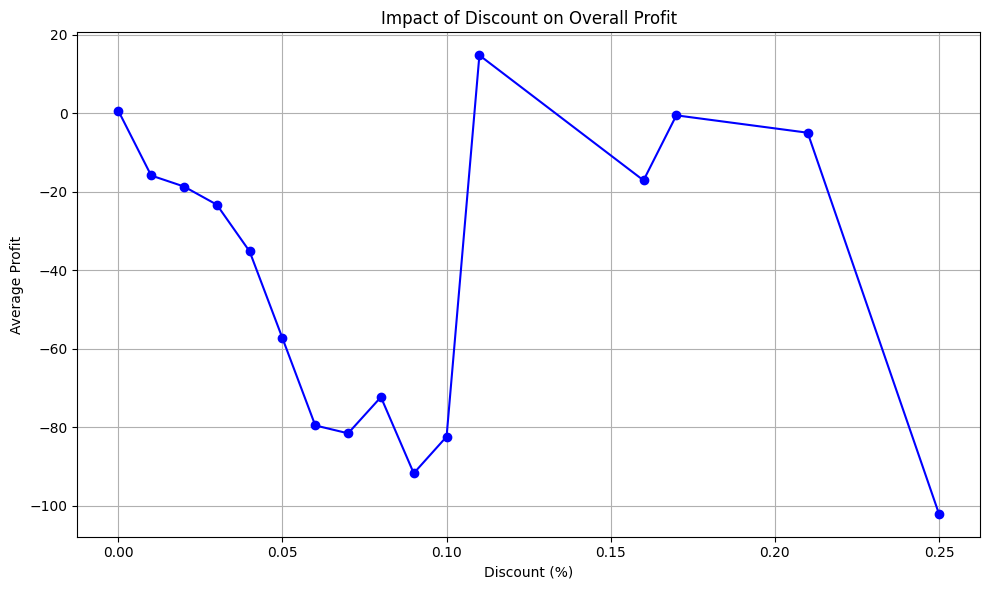

In [18]:
data['Profit'] = data['Sales'] - (data['Unit Price'] * data['Quantity ordered new'] + data['Shipping Cost'])

# Group data by 'Discount' and calculate the average profit
discount_profit_analysis = data.groupby('Discount')['Profit'].mean()

# Plotting the relationship between discount and average profit
plt.figure(figsize=(10, 6))
discount_profit_analysis.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Impact of Discount on Overall Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Average Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Calculate profit margin (profit divided by sales) for each row
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

# Group data by 'Product Name' and calculate the average profit margin
product_profit_margin = data.groupby('Product Name')['Profit Margin'].mean()

# Sort the products by average profit margin in ascending order
low_margin_products = product_profit_margin.sort_values().head(10)  # Adjust the number as needed

# Print products with consistently low profit margins
print("Products with consistently low profit margins:")
print(low_margin_products)

Products with consistently low profit margins:
Product Name
Hoover® Commercial Lightweight Upright Vacuum                                                       -164.120394
Bravo II™ Megaboss® 12-Amp Hard Body Upright, Replacement Belts, 2 Belts per Pack                    -80.036867
Hoover Portapower™ Portable Vacuum                                                                   -53.913442
Seth Thomas 14" Putty-Colored Wall Clock                                                             -46.687800
Peel & Stick Add-On Corner Pockets                                                                   -36.565836
G.E. Longer-Life Indoor Recessed Floodlight Bulbs                                                    -32.077330
Avery Reinforcements for Hole-Punch Pages                                                            -30.508099
DAX Clear Channel Poster Frame                                                                       -29.228322
V66                                         

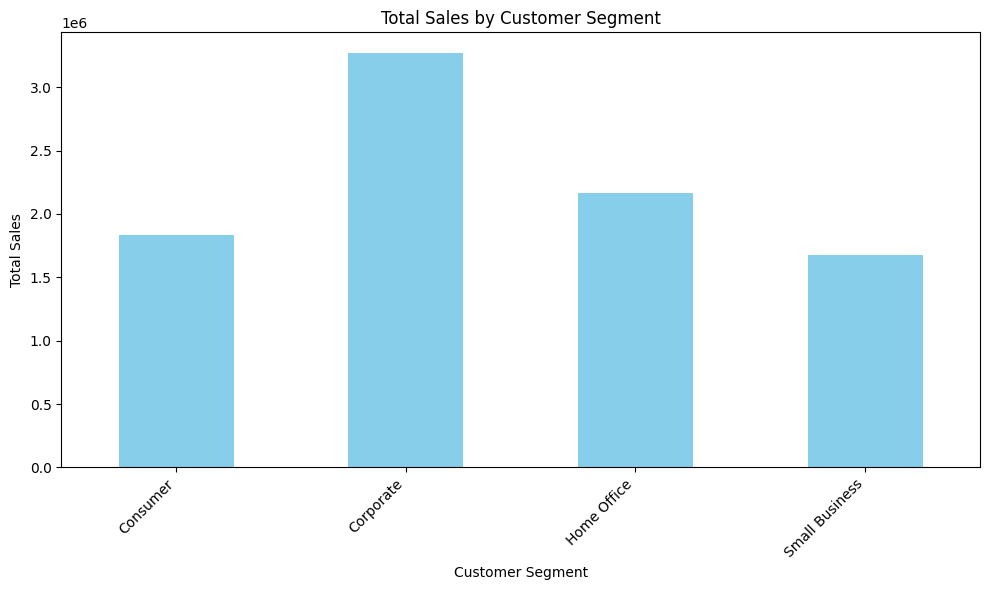

In [22]:
segment_sales = data.groupby('Customer Segment')['Sales'].sum()

# Plotting the relationship between customer segment and total sales
plt.figure(figsize=(10, 6))
segment_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

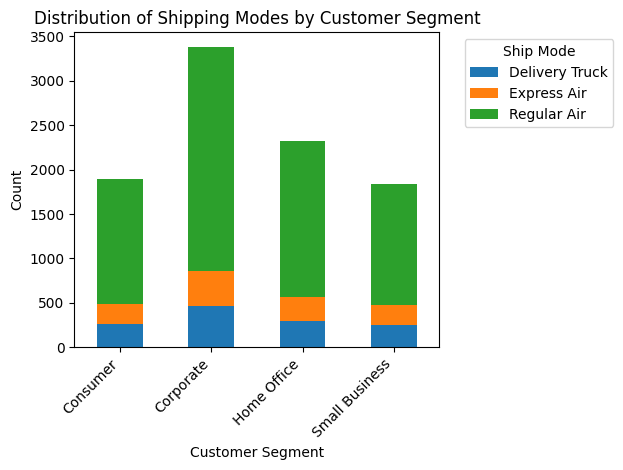

In [23]:
segment_ship_mode_counts = data.groupby(['Customer Segment', 'Ship Mode']).size().unstack()

# Plotting the distribution of shipping modes by customer segment
plt.figure(figsize=(10, 6))
segment_ship_mode_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Shipping Modes by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



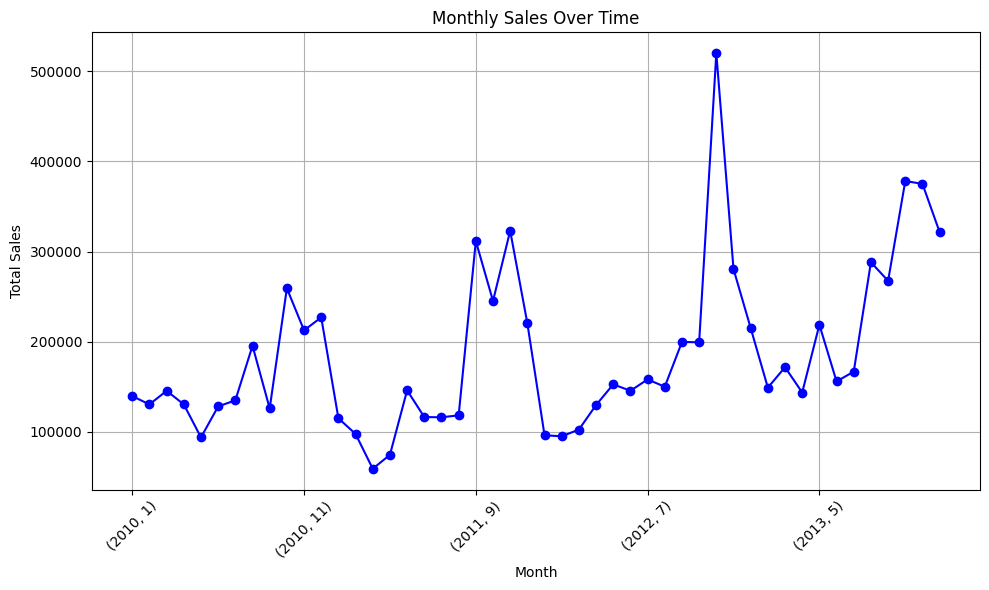

In [24]:
# Extract month and year from 'Order Date'
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

# Group data by month and calculate total sales for each month
monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum()

# Plotting the monthly sales over time
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='b', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

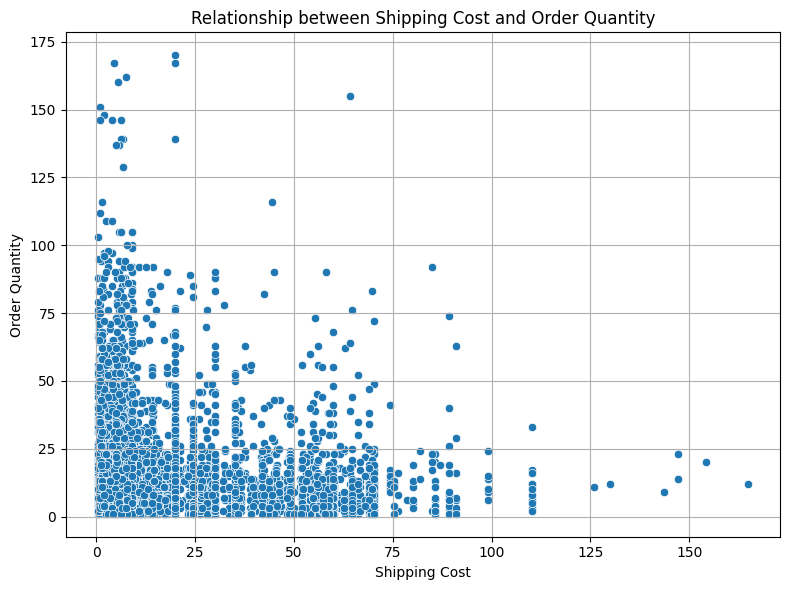

Pearson correlation coefficient: -0.020197820975390548


In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Shipping Cost', y='Quantity ordered new')
plt.title('Relationship between Shipping Cost and Order Quantity')
plt.xlabel('Shipping Cost')
plt.ylabel('Order Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculating the Pearson correlation coefficient
correlation_coefficient = data['Shipping Cost'].corr(data['Quantity ordered new'])
print("Pearson correlation coefficient:", correlation_coefficient)

In [28]:
# Group data by 'Customer ID' and calculate total sales and profit for each customer
customer_sales_profit = data.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort customers by total sales and profit in descending order
top_sales_customers = customer_sales_profit.sort_values(by='Sales', ascending=False).head(10)
top_profit_customers = customer_sales_profit.sort_values(by='Profit', ascending=False).head(10)

# Print the top customers in terms of sales volume and profitability
print("Top customers in terms of sales volume:")
print(top_sales_customers)

print("\nTop customers in terms of profitability:")
print(top_profit_customers)

Top customers in terms of sales volume:
                 Sales   Profit
Customer ID                    
3075         123745.62 -2748.07
308           89269.70 -5101.15
2571          86540.75 -2030.97
2107          83651.70 -2166.65
553           81296.39 -9377.56
1733          78243.60 -2508.75
640           69118.00 -4980.64
1999          61610.60 -8117.74
2867          61298.98 -1254.92
349           58947.41 -2421.55

Top customers in terms of profitability:
                Sales   Profit
Customer ID                   
491          40870.86  1645.14
35           21760.88   921.41
1025         27828.72   845.85
2565         55793.40   806.31
883          18764.30   791.85
1044         21346.26   649.79
324          14954.99   623.80
1583          9629.91   616.01
679          14924.99   577.76
3397         26284.68   540.00


In [29]:
orders_per_customer = data.groupby('Customer ID')['Order ID'].nunique()

# Calculate the number of repeat customers (customers with more than one order)
repeat_customers = (orders_per_customer > 1).sum()

# Calculate the total number of unique customers
total_customers = len(orders_per_customer)

# Calculate the percentage of repeat customers
repeat_customers_percentage = (repeat_customers / total_customers) * 100

print("Number of repeat customers:", repeat_customers)
print("Total number of unique customers:", total_customers)
print("Percentage of repeat customers:", repeat_customers_percentage)

Number of repeat customers: 1676
Total number of unique customers: 2703
Percentage of repeat customers: 62.00517943026267


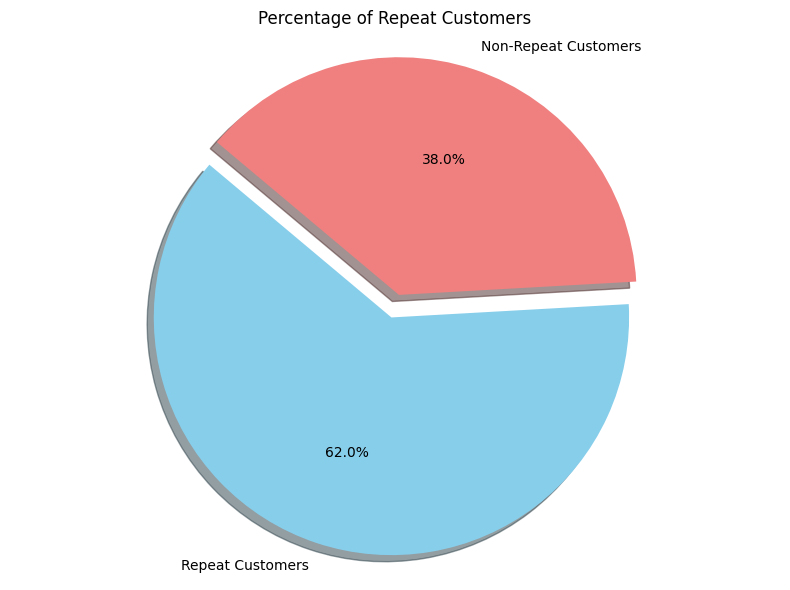

In [30]:
orders_per_customer = data.groupby('Customer ID')['Order ID'].nunique()

# Calculate the number of repeat customers (customers with more than one order)
repeat_customers = (orders_per_customer > 1).sum()

# Calculate the total number of unique customers
total_customers = len(orders_per_customer)

# Calculate the percentage of repeat customers
repeat_customers_percentage = (repeat_customers / total_customers) * 100

# Plotting the percentage of repeat customers
labels = ['Repeat Customers', 'Non-Repeat Customers']
sizes = [repeat_customers_percentage, 100 - repeat_customers_percentage]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Repeat Customers)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Repeat Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [31]:
segment_profit = data.groupby('Customer Segment')['Profit'].sum()

# Find the most profitable customer segment
most_profitable_segment = segment_profit.idxmax()

# Filter data for the most profitable customer segment
most_profitable_customers = data[data['Customer Segment'] == most_profitable_segment]

# Calculate demographics of the most profitable customer segment
demographics = most_profitable_customers[['Customer Segment', 'Region', 'State or Province', 'City', 'Postal Code']]

# Display demographics of the most profitable customer segment
print("Demographics of the most profitable customer segment:")
print(demographics.head())

Demographics of the most profitable customer segment:
   Customer Segment   Region State or Province        City  Postal Code
19   Small Business  Central         Minnesota  Prior Lake        55372
20   Small Business  Central         Minnesota  Prior Lake        55372
21   Small Business  Central         Minnesota  Prior Lake        55372
22   Small Business  Central         Minnesota  Prior Lake        55372
23   Small Business  Central         Minnesota  Prior Lake        55372
